<a href="https://colab.research.google.com/github/wassimbenslimene/Decision-Tree-Classifier-to-predict-the-safety-car/blob/master/Decision_Tree_Classifier_to_predict_the_safety_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('carvvv.csv', sep=",")
data.head()


,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
X = data.drop(['Lug_boot','Safety','Class'], axis=1)
 

y = data['Class']

In [0]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 )

In [18]:
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Buying', 'Maint', 'Doors', 'Persons'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Buying,Maint,Doors,Persons
434,1,1,1,1
139,2,2,2,1
1710,3,3,3,2
44,2,1,2,2
1263,4,3,4,3


In [0]:
# instantiate the DecisionTreeClassifier model with criterion entropy
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6628


[Text(242.75926573426574, 410.71999999999997, 'X[3] <= 1.5\nentropy = 1.227\nsamples = 1209\nvalue = [269, 53, 840, 47]'),
 Text(238.07674825174826, 362.4, 'entropy = 0.0\nsamples = 404\nvalue = [0, 0, 404, 0]'),
 Text(247.44178321678322, 362.4, 'X[0] <= 2.5\nentropy = 1.505\nsamples = 805\nvalue = [269, 53, 436, 47]'),
 Text(71.40839160839161, 314.08, 'X[1] <= 1.5\nentropy = 0.915\nsamples = 400\nvalue = [132, 0, 268, 0]'),
 Text(66.72587412587413, 265.76, 'entropy = 0.0\nsamples = 97\nvalue = [0, 0, 97, 0]'),
 Text(76.0909090909091, 265.76, 'X[1] <= 2.5\nentropy = 0.988\nsamples = 303\nvalue = [132, 0, 171, 0]'),
 Text(25.753846153846155, 217.44, 'X[0] <= 1.5\nentropy = 0.841\nsamples = 100\nvalue = [27, 0, 73, 0]'),
 Text(21.071328671328672, 169.12, 'X[2] <= 1.5\nentropy = 0.999\nsamples = 52\nvalue = [27, 0, 25, 0]'),
 Text(9.365034965034965, 120.80000000000001, 'X[3] <= 2.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 0, 8, 0]'),
 Text(4.682517482517483, 72.48000000000002, 'entropy

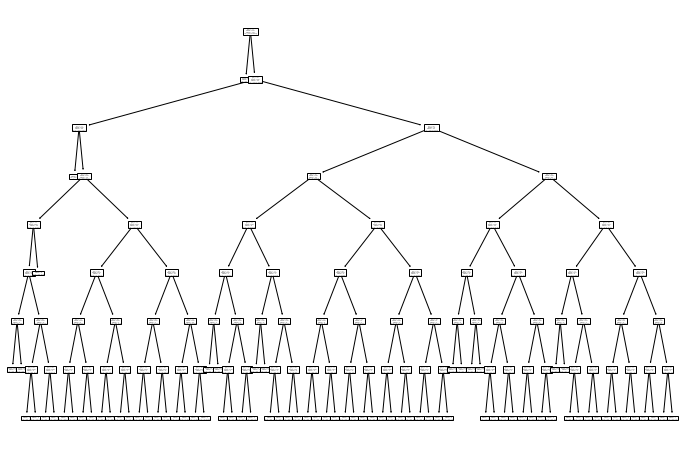

In [21]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [22]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7502
Test set score: 0.6628
